In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import scipy
import re
import seaborn as sns
sns.set_theme()

pd.set_option('display.max_columns', None)

In [2]:
path = '/Users/gabrielketron/tpot2_addimputers/tpot2/ImputerExperiments/data/c/class.csv'

class_data = pd.read_csv(path)

class_data.head(5)

class_data = class_data.dropna(how='any')

class_data.head(5)

class_data = class_data.replace('_', '', regex=True)
class_data = class_data.replace('/', '', regex=True)
class_data.head(5)
class_data.drop(columns=class_data.columns[0], axis=1, inplace=True)
convert_dict = {'DatasetID': int}
class_data = class_data.astype(convert_dict)
convert_dict = {'DatasetID': str}
class_data = class_data.astype(convert_dict)
class_data.head(5)

class_data = class_data.sort_values(by=['DatasetID', 'Condition', 'Level', 'Triplicate'], ascending=True)
class_data.head(-1)

#print(class_data[(class_data.Exp_Name == 'classfull') & (class_data.Level == '0.01')]['Exp2ImputeModel'].value_counts())

,DatasetID,Exp_Name,Condition,Level,Triplicate,Exp1ImputeRMSEAcc,Exp2ImputeModel,Exp2train_auroc,Exp2train_accuracy,Exp2train_balanced_accuracy,Exp2train_logloss,Exp2train_f1,Exp2ori_auroc,Exp2ori_accuracy,Exp2ori_balanced_accuracy,Exp2ori_logloss,Exp2ori_f1,Exp2impute_auroc,Exp2impute_accuracy,Exp2impute_balanced_accuracy,Exp2impute_logloss,Exp2impute_f1,Exp2ClassifierModel,Exp2duration,Exp3train_auroc,Exp3train_accuracy,Exp3train_balanced_accuracy,Exp3train_logloss,Exp3train_f1,Exp3ori_auroc,Exp3ori_accuracy,Exp3ori_balanced_accuracy,Exp3ori_logloss,Exp3ori_f1,Exp3impute_auroc,Exp3impute_accuracy,Exp3impute_balanced_accuracy,Exp3impute_logloss,Exp3impute_f1,Exp3ImputeModel,Exp3ImputeRMSEAcc,Exp3ClassifierModel,Exp3duration
72,30,classsimple,MAR,0.01,1,0.108656,SimpleImputer,0.999840,0.995127,0.983960,0.025247,0.995154,0.998065,0.979927,0.900185,0.060851,0.980131,0.998095,0.978102,0.833518,0.062886,0.977585,HistGradientBoostingClassifier,3410.279198,0.999942,0.996345,0.986696,0.017947,0.996358,0.997772,0.974453,0.803622,0.062175,0.973558,0.997644,0.974453,0.803622,0.066684,0.973558,SimpleImputer,0.211418,XGBClassifier,2827.926290
84,30,classfull,MAR,0.01,1,0.016025,IterativeImputer,0.999699,0.990863,0.952938,0.034917,0.990792,0.997940,0.972628,0.751503,0.066207,0.971142,0.997940,0.972628,0.751503,0.066207,0.971142,RandomForestClassifier,3982.565915,0.999617,0.988629,0.925738,0.038963,0.988409,0.997725,0.979927,0.864634,0.072267,0.979589,0.997725,0.979927,0.864634,0.072143,0.979589,KNNImputer,0.038405,ExtraTreesClassifier,9016.492671
96,30,classsimple,MAR,0.01,2,0.139984,SimpleImputer,0.999889,0.995939,0.987867,0.024852,0.995973,0.998287,0.974453,0.793114,0.063803,0.973773,0.997852,0.970803,0.774526,0.068660,0.970050,HistGradientBoostingClassifier,3610.401839,0.999799,0.991066,0.942490,0.034564,0.990918,0.995942,0.978102,0.800394,0.134547,0.977177,0.995197,0.974453,0.799581,0.142368,0.973777,SimpleImputer,0.316208,BaggingClassifier,2724.422766
108,30,classfull,MAR,0.01,2,0.011169,IterativeImputer,0.999957,0.997360,0.989409,0.012202,0.997376,0.997493,0.981752,0.861000,0.062457,0.981607,0.997188,0.979927,0.854940,0.067389,0.979725,XGBClassifier,1640.185265,0.999003,0.988020,0.957278,0.053077,0.987458,0.998481,0.979927,0.839579,0.078653,0.979438,0.997519,0.979927,0.833518,0.086205,0.979287,IterativeImputer,0.028294,LGBMClassifier,11279.809171
120,30,classsimple,MAR,0.01,3,0.112247,SimpleImputer,0.999929,0.997360,0.985697,0.025345,0.997360,0.997127,0.976277,0.782212,0.136337,0.975273,0.997056,0.974453,0.781806,0.079273,0.973538,BaggingClassifier,2292.138603,0.999856,0.994112,0.971185,0.029939,0.994114,0.997634,0.978102,0.810089,0.070118,0.977213,0.997544,0.976277,0.809682,0.068579,0.975497,SimpleImputer,0.168352,RandomForestClassifier,4200.455975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,6,classsimple,MNAR,0.5,1,0.101225,SimpleImputer,1.000000,0.999944,0.999944,0.000987,0.999944,0.994806,0.879500,0.878763,0.455737,0.879809,0.956085,0.613500,0.612776,1.610756,0.615000,HistGradientBoostingClassifier,10701.961883,0.999977,0.996167,0.996158,0.139078,0.996174,0.994508,0.859000,0.858144,0.462391,0.859557,0.951413,0.575500,0.574549,1.421422,0.578157,SimpleImputer,0.084797,LGBMClassifier,9904.439615
19,6,classfull,MNAR,0.5,1,0.094211,IterativeImputer,1.000000,1.000000,1.000000,0.011904,1.000000,0.996750,0.886500,0.885826,0.363384,0.886100,0.950675,0.643500,0.642646,1.515719,0.648095,HistGradientBoostingClassifier,10982.570914,1.000000,1.000000,1.000000,0.001296,1.000000,0.995923,0.868500,0.868002,0.439077,0.868559,0.955910,0.608000,0.607293,1.626418,0.609818,SimpleImputer,0.084371,HistGradientBoostingClassifier,13888.696249
31,6,classsimple,MNAR,0.5,2,0.101628,SimpleImputer,1.000000,1.000000,1.000000,0.000093,1.000000,0.996427,0.885500,0.885064,0.436478,0.885102,0.957828,0.604500,0.604339,1.777490,0.60490

Things to record~
Things to conduct pairwise comparion on:
(Within Each Dataset)
Within the same (impute first vs exp):
significant differences between five scores, RMSEAcc, and duration
graph differences
Between Exps (Complex vs Simple only):
significant differences between five scores, RMSEAcc, and duration
graph differences

For all data, subgrouped by MAR, MNAR, and MCAR
Within the same (impute first vs exp):
significant differences between five scores, RMSEAcc, and duration
graph differences
Between Exps (Complex vs Simple only):
significant differences between five, RMSEAcc, and duration
graph differences

For all data total:
Within the same (impute first vs exp):
significant differences between five scores, RMSEAcc, and duration
graph differences
Between Exps (Complex vs Simple only):
significant differences between five, RMSEAcc, and duration
graph differences


Counts/Proportions for graphing
(Within each dataset + for all data)
How often Exp2 Impute Model is selected (Impute First)
How often Exp2 Classifier Model is selected (Impute First)
How often Exp3 Impute Model is selected
How often Exp3 Classifier Model is selected 
avg f1 change over each level and type
*and for each of the five scorers
RMSEAcc changes over each level and type
duration changes over each type and level

Create clustering of all the data to see if any patterns emerge (can we reidentify the missingness groupings, even when they arnt explicitly stated?)
or if grouped by missing type, can we ID missing level? 

ANCOVA?

Start with Counts/Proportions for graphing
(Within each dataset + for all data)
How often 1.Exp2 Impute Model is selected (Impute First)
How often 2.Exp2 Classifier Model is selected (Impute First)
How often 3.Exp3 Impute Model is selected
How often 4.Exp3 Classifier Model is selected 
avg f1 change over each level and type
*and for each of the five scorers
RMSEAcc changes over each level and type
duration changes over each type and level


In [3]:
def display_model_proportions(df, exp, savepath, complex = False, dataset_list=None, show=False):
    if dataset_list is not None:
        temp = df.loc[df['DatasetID'].isin(dataset_list)].copy()
    else:
        temp = df.copy()
        dataset_list = 'All Datasets'
    if complex:
        name = 'classfull'
        temp = temp[temp.Exp_Name == name]
        subtitle = 'Complex'
        
    else:
        name = 'classsimple'
        temp = temp[temp.Exp_Name == name]
        subtitle = 'Simple'
        

    xvals = [0.01, 0.1, 0.3, 0.5]
    xlabel = 'Percent Missing (%)'
    ylabel = 'Selection Freqeuncy(%)'

    all_models = {}
    mar_models = {}
    mcar_models = {}
    mnar_models = {}

    match exp:
        case 1: 
           pipe = 'Exp2ImputeModel'
           title = 'Impute First Imputer Models'
           subtitle = 'Impute First'
        case 2:
            pipe = 'Exp2ClassifierModel'
            title = 'Impute First Classifier Models'
            subtitle = 'Impute First'
        case 3:
            pipe = 'Exp3ImputeModel'
            title = subtitle+' TPOT2 Imputer Models'
        case 4: 
            pipe = 'Exp3ClassifierModel'
            title = subtitle+' TPOT2 Classifier Models'

    for model in temp[pipe].unique():
        new_list = []
        for val in xvals:
            try:
                new_list.append(temp[temp.Level == str(val)][pipe].value_counts()[model]/temp[temp.Level == str(val)][pipe].value_counts().sum())
            except:
                new_list.append(0.0)
        all_models[model] = new_list
    for model in temp[temp.Condition == 'MAR'][pipe].unique():
        new_list = []
        for val in xvals:
            try:
                new_list.append(temp[(temp.Condition == 'MAR')&(temp.Level == str(val))][pipe].value_counts()[model]/temp[(temp.Condition == 'MAR')&(temp.Level == str(val))][pipe].value_counts().sum())
            except:
                new_list.append(0.0)
        mar_models[model] = new_list
    for model in temp[temp.Condition == 'MCAR'][pipe].unique():
        new_list = []
        for val in xvals:
            try:
                new_list.append(temp[(temp.Condition == 'MCAR')&(temp.Level == str(val))][pipe].value_counts()[model]/temp[(temp.Condition == 'MCAR')&(temp.Level == str(val))][pipe].value_counts().sum())
            except:
                new_list.append(0.0)
        mcar_models[model] = new_list
    for model in temp[temp.Condition == 'MNAR'][pipe].unique():
        new_list = []
        for val in xvals:
            try:
                new_list.append(temp[(temp.Condition == 'MNAR')&(temp.Level == str(val))][pipe].value_counts()[model]/temp[(temp.Condition == 'MNAR')&(temp.Level == str(val))][pipe].value_counts().sum())
            except:
                new_list.append(0.0)
        mnar_models[model] = new_list
    fig, a = plt.subplots(2,2)
    for i, label in enumerate(all_models):
        a[0][0].plot(xvals,all_models[label], color="C"+str(i), label=str(label))
        try:
            a[0][1].plot(xvals,mar_models[label], color="C"+str(i))
        except:
            save = i
        try:
            a[1][0].plot(xvals,mcar_models[label], color="C"+str(i))
        except:
            save = i
        try:
            a[1][1].plot(xvals, mnar_models[label], color="C"+str(i))
        except:
            save = i
            
    a[0][0].set_title('All Conditions')
    a[0][0].set_xlabel(xlabel)
    a[0][0].set_ylabel(ylabel)
    a[0][0].set_xticks(np.arange(0, 0.6, 0.1))  
    a[0][0].set_yticks(np.arange(0, 1.1, 0.2))      
    a[0][1].set_title('Missing At Random')
    a[0][1].set_xlabel(xlabel)
    a[0][1].set_ylabel(ylabel)
    a[0][1].set_xticks(np.arange(0, 0.6, 0.1))  
    a[0][1].set_yticks(np.arange(0, 1.1, 0.2))  
    a[1][0].set_title('Missing Completely At Random')
    a[1][0].set_xlabel(xlabel)
    a[1][0].set_ylabel(ylabel)
    a[1][0].set_xticks(np.arange(0, 0.6, 0.1))  
    a[1][0].set_yticks(np.arange(0, 1.1, 0.2))  
    a[1][1].set_title('Missing Not At Random')
    a[1][1].set_xlabel(xlabel)
    a[1][1].set_ylabel(ylabel)
    a[1][1].set_xticks(np.arange(0, 0.6, 0.1))  
    a[1][1].set_yticks(np.arange(0, 1.1, 0.2))  
    fig.suptitle('Classification ' + subtitle+' Model Space: '+ str(dataset_list)+' Selection Frequency of ' + title)
    lgd=fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
    fig.tight_layout()
    #fig.savefig(savepath + name+'_'+ str(dataset_list)+'_'+pipe+'.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    return

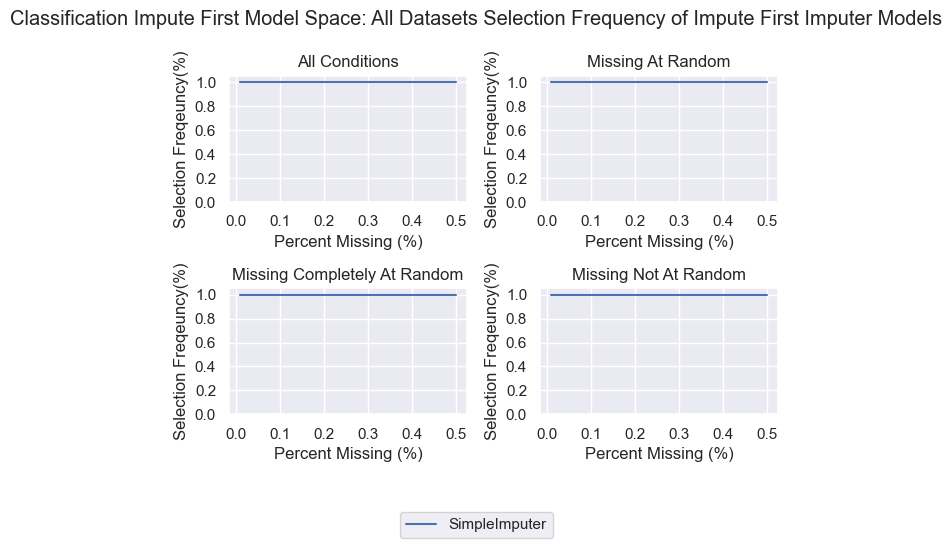

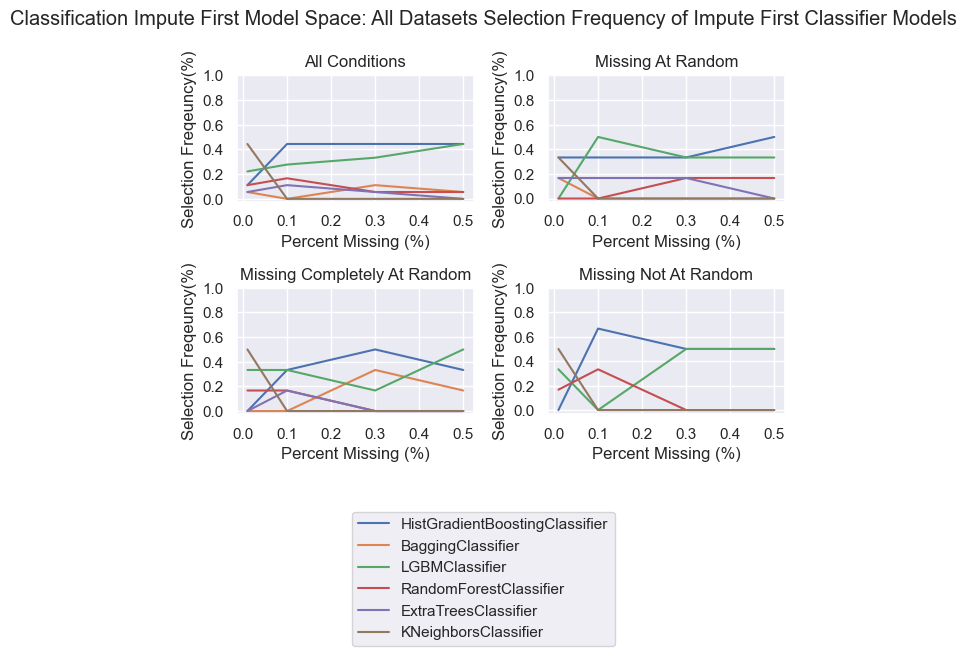

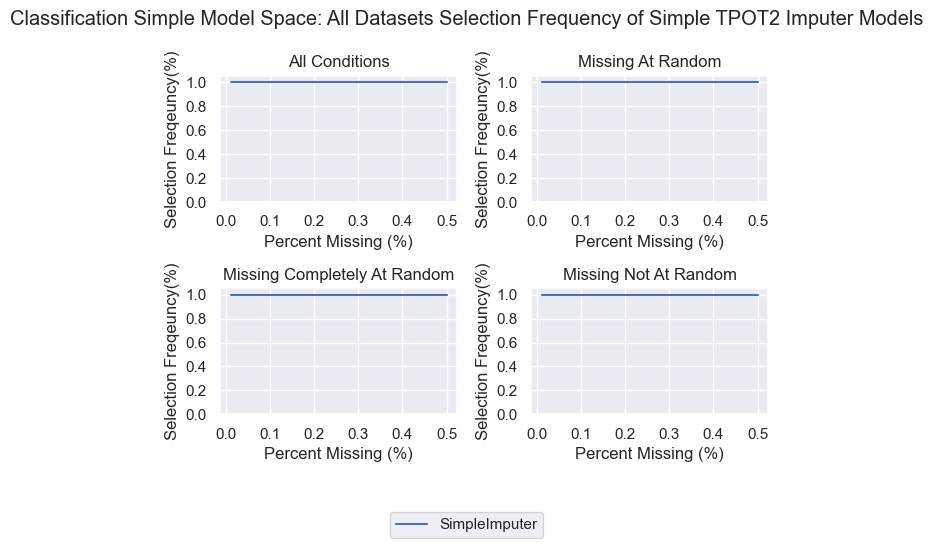

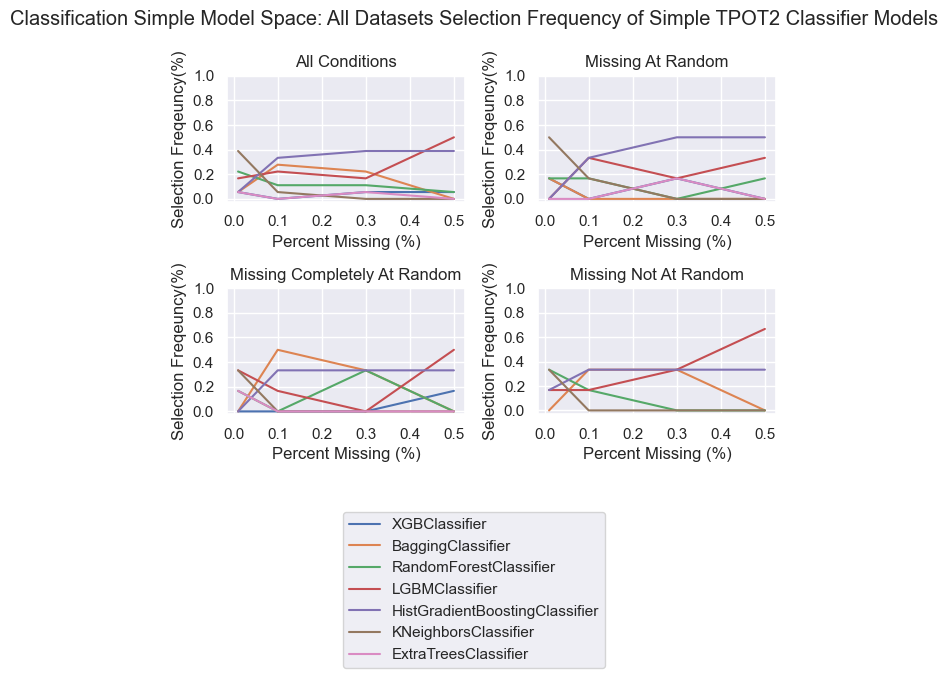

In [4]:
for i in range(1,5):
    display_model_proportions(class_data, exp=i, complex=False, savepath='/Users/gabrielketron/tpot2_addimputers/tpot2/ImputerExperiments/data/c/Saved_Analysis/')


In [5]:
def display_scores_over_options(df, score_type, savepath,
                                dataset_list=None):
    if dataset_list is not None:
        temp = df.loc[df['DatasetID'].isin(dataset_list)].copy()
    else:
        temp = df.copy()
        dataset_list = 'All Datasets'
    
    #select temp datasets for impute first, complex, and simple to compare across model settings
    
    name = 'class'
    fulltemp = temp[temp.Exp_Name == name+'full']
    simpletemp = temp[temp.Exp_Name != name+'full']
    name = 'Classification'
        
    match score_type:
        case 'f1':
            imputer = 'Exp2train_f1'
            complexer = 'Exp3train_f1'
            simpler = 'Exp3train_f1'
            ylabel = 'Weighted f1 Score (%) '
        case 'auroc':
            imputer = 'Exp2impute_auroc'
            complexer = 'Exp3impute_auroc'
            simpler = 'Exp3impute_auroc'
            ylabel = 'AUROC (%) '
        case 'accuracy':
            imputer = 'Exp2impute_accuracy'
            complexer = 'Exp3impute_accuracy'
            simpler = 'Exp3impute_accuracy'
            ylabel = 'Accuracy (%) '
        case 'balanced_accuracy':
            imputer = 'Exp2impute_balanced_accuracy'
            complexer = 'Exp3impute_balanced_accuracy'
            simpler = 'Exp3impute_balanced_accuracy'
            ylabel = 'Balanced Accuracy (%)'
        case 'logloss':
            imputer = 'Exp2impute_logloss'
            complexer = 'Exp3impute_logloss'
            simpler = 'Exp3impute_logloss'
            ylabel = 'Log Loss (%)'
        case 'training_duration':
            imputer = 'Exp2duration'
            complexer = 'Exp3duration'
            simpler = 'Exp3duration'
            ylabel = 'Training Time (Seconds)'
        case 'RMSEAcc':
            imputer = 'Exp1ImputeRMSEAcc'
            complexer = 'Exp3ImputeRMSEAcc'
            simpler = 'Exp3ImputeRMSEAcc'
            ylabel = 'Imputation Accurcy (RMSE)'
        


    xvals = [0.01, 0.1, 0.3, 0.5]
    xlabel = 'Percent Missing'
    all_models = {}
    mar_models = {}
    mcar_models = {}
    mnar_models = {}


    for i, model in enumerate([imputer, complexer, simpler]):
        all_list = []
        for val in xvals:
            if i == 2:
                try:
                    all_list.append(simpletemp[simpletemp.Level == str(val)][model].mean())
                except:
                    all_list.append(0.0)
            else:
                try:
                    all_list.append(fulltemp[fulltemp.Level == str(val)][model].mean())
                except:
                    all_list.append(0.0)
        if i == 2:
            all_models['simple_'+model] = all_list
        else:
            all_models[model] = all_list
    
    for i, model in enumerate([imputer, complexer, simpler]):
        all_list = []
        for val in xvals:
            if i == 2:
                try:
                    all_list.append(simpletemp[(temp.Condition == 'MAR')&(temp.Level == str(val))][model].mean())
                except:
                    all_list.append(0.0)
            else:
                try:
                    all_list.append(fulltemp[(temp.Condition == 'MAR')&(temp.Level == str(val))][model].mean())
                except:
                    all_list.append(0.0)
        if i == 2:
            mar_models['simple_'+model] = all_list
        else:
            mar_models[model] = all_list
    
    for i, model in enumerate([imputer, complexer, simpler]):
        all_list = []
        for val in xvals:
            if i == 2:
                try:
                    all_list.append(simpletemp[(temp.Condition == 'MCAR')&(temp.Level == str(val))][model].mean())
                except:
                    all_list.append(0.0)
            else:
                try:
                    all_list.append(fulltemp[(temp.Condition == 'MCAR')&(temp.Level == str(val))][model].mean())
                except:
                    all_list.append(0.0)
        if i == 2:           
            mcar_models['simple_'+model] = all_list
        else:
            mcar_models[model] = all_list
    
    for i, model in enumerate([imputer, complexer, simpler]):
        all_list = []
        for val in xvals:
            if i == 2:
                try:
                    all_list.append(simpletemp[(temp.Condition == 'MNAR')&(temp.Level == str(val))][model].mean())
                except:
                    all_list.append(0.0)
            else:
                try:
                    all_list.append(fulltemp[(temp.Condition == 'MNAR')&(temp.Level == str(val))][model].mean())
                except:
                    all_list.append(0.0)
        if i == 2:
            mnar_models['simple_'+model] = all_list
        else:
            mnar_models[model] = all_list
    for sets in [all_models, mar_models, mcar_models, mnar_models]:
        sets['Impute First '+score_type] = sets[imputer]
        sets['Complex '+score_type] = sets[complexer]
        sets['Simple '+score_type] = sets['simple_'+simpler]
        del sets[imputer], sets[complexer], sets['simple_'+simpler]
    
    fig, a = plt.subplots(2,2,sharey=True)
    
    for i, label in enumerate(all_models):
        a[0][0].plot(xvals,all_models[label], color="C"+str(i), label=str(label))
        try:
            a[0][1].plot(xvals,mar_models[label], color="C"+str(i))
        except:
            save = i
        try:
            a[1][0].plot(xvals,mcar_models[label], color="C"+str(i))
        except:
            save = i
        try:
            a[1][1].plot(xvals, mnar_models[label], color="C"+str(i))
        except:
            save = i

    a[0][0].set_title('All Conditions')
    a[0][0].set_xlabel(xlabel)
    a[0][0].set_ylabel(ylabel)
    #a[0][0].set_xticks(np.arange(0, 0.6, 0.1)) 
    #a[0][0].set_yticks(yaxes)       
    
    a[0][1].set_title('Missing At Random')
    a[0][1].set_xlabel(xlabel)
    a[0][1].set_ylabel(ylabel)
    #a[0][1].set_xticks(np.arange(0, 0.6, 0.1)) 
    #a[0][1].set_yticks(yaxes)   
    a[1][0].set_title('Missing Completely At Random')
    a[1][0].set_xlabel(xlabel)
    a[1][0].set_ylabel(ylabel)
    #a[1][0].set_xticks(np.arange(0, 0.6, 0.1))
    #a[1][0].set_yticks(yaxes)  
    a[1][1].set_title('Missing Not At Random')
    a[1][1].set_xlabel(xlabel)
    a[1][1].set_ylabel(ylabel)
    #a[1][1].set_xticks(np.arange(0, 0.6, 0.1)) 
    #a[1][1].set_yticks(yaxes)   
    fig.suptitle(name+': '+ str(dataset_list)+' Train '+score_type+' Scores for Each Experiment')
    lgd = fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
    fig.tight_layout()
    #fig.savefig(savepath + name+'_'+ str(dataset_list)+'_'+score_type+'.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    return
    

/var/folders/b8/05y1vdbd3vd52x71qyhklyjw0000gn/T/ipykernel_17582/2178421781.py:91: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_list.append(fulltemp[(temp.Condition == 'MAR')&(temp.Level == str(val))][model].mean())
/var/folders/b8/05y1vdbd3vd52x71qyhklyjw0000gn/T/ipykernel_17582/2178421781.py:91: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_list.append(fulltemp[(temp.Condition == 'MAR')&(temp.Level == str(val))][model].mean())
/var/folders/b8/05y1vdbd3vd52x71qyhklyjw0000gn/T/ipykernel_17582/2178421781.py:91: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_list.append(fulltemp[(temp.Condition == 'MAR')&(temp.Level == str(val))][model].mean())
/var/folders/b8/05y1vdbd3vd52x71qyhklyjw0000gn/T/ipykernel_17582/2178421781.py:91: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_list.append(fulltemp[(temp.Condition == 'MAR')&(temp.Level == str(val))][mod

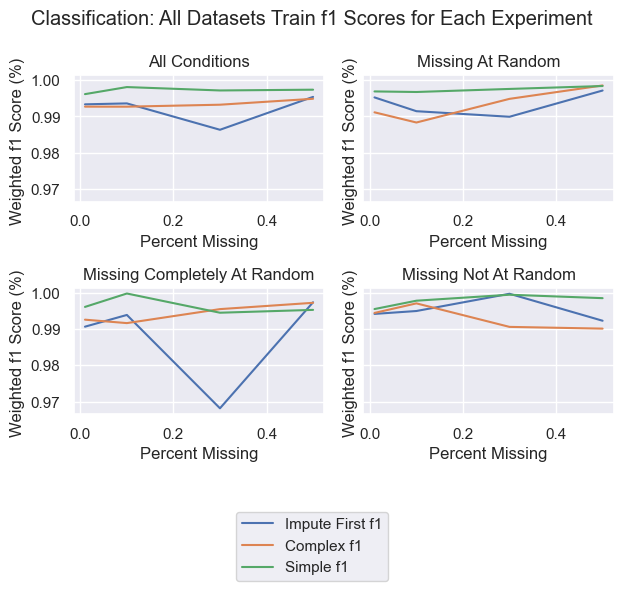

In [6]:
display_scores_over_options(class_data, score_type='f1', savepath='/Users/gabrielketron/tpot2_addimputers/tpot2/ImputerExperiments/data/c/Saved_Analysis/')


In [7]:
# Generate random distribution of integers between 0-10 as the first feature
x1 = np.random.choice([0,1,2,3,4,5,6,7,8,9,10], p=[0.01, 0.01, 0.15, 0.19, 0.05, 0.11, 0.2, 0.16, 0.10, 0.01, 0.01], size=(500))

# Apply random noise on each sample so they don't overlap on the x-axis in scatter plot
idxs = np.arange(len(x1))
out = x1.astype(float)
out.flat[idxs] += np.random.uniform(low=-1, high=1, size=len(idxs))
x1 = out

# Generate random distribution of integers between 6-17 as the second feature
x2 = np.random.choice([6,7,8,9,10,11,12,13,14,15,16,17], p=[0.01, 0.01, 0.15, 0.23, 0.14, 0.06, 0.05, 0.10, 0.12, 0.11, 0.01, 0.01], size=(500))

# Apply random noise on each sample so they don't overlap on the y-axis in scatter plot
idxs = np.arange(len(x2))
out = x2.astype(float)
out.flat[idxs] += np.random.uniform(low=-1, high=1, size=len(idxs))
x2 = out

# Generate random distribution of integers between 6-17 as the second feature
x3 = np.random.choice([8,9,10,11,12,13,14,15,16,17,18,19], p=[0.01, 0.01, 0.15, 0.23, 0.14, 0.06, 0.05, 0.10, 0.12, 0.11, 0.01, 0.01], size=(500))

# Apply random noise on each sample so they don't overlap on the y-axis in scatter plot
idxs = np.arange(len(x3))
out = x3.astype(float)
out.flat[idxs] += np.random.uniform(low=-1, high=1, size=len(idxs))
x3 = out


# Combine features in a list
data_x = [x1, x2, x3]

In [8]:
def rainplot_annotate_brackets(num1, num2, data, size, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=3):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data.pvalue) is str:
        text = data.pvalue
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05

        while data.pvalue < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'
        
        if data.pvalue < 0.0001:
            text = text + '\n p=' + re.sub("[$@.&?].*[$@e&?]", "", str(data.pvalue))[:1] + 'e' + re.sub("[$@.&?].*[$@e&?]", "", str(data.pvalue))[1:]+'\n Effect=' + str(round(np.abs(data.zstatistic/np.sqrt(size)),2))

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_xlim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    bary = [lx, lx, rx, rx]
    barx = [y, y+barh, y+barh, y]
    mid = (y+barh, (lx+rx)*0.97/2)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom', backgroundcolor='white', alpha=1.0)
    if fs is not None:
        kwargs['fontsize'] = fs
    
    

    plt.text(*mid, text, **kwargs)

In [9]:
import scipy.stats

def wilcoxon_rainplot(data_x, scorer='Values', title='RaincloudPlot'):

    fig, ax = plt.subplots(figsize=(8, 4))

    # Create a list of colors for the boxplots based on the number of features you have
    boxplots_colors = ['yellowgreen', 'olivedrab', 'purple']

    # Boxplot data
    bp = ax.boxplot(data_x, patch_artist = True, vert = False)

    # Change to the desired color and add transparency
    for patch, color in zip(bp['boxes'], boxplots_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.4)
    
    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[0] # top of median line
        # overlay median value
        plt.text(x, y, '%.3f' % x, horizontalalignment='center') # draw above, centered

    # Create a list of colors for the violin plots based on the number of features you have
    violin_colors = ['thistle', 'orchid', 'red']

    # Violinplot data
    vp = ax.violinplot(data_x, points=500, 
                showmeans=False, showextrema=False, showmedians=False, vert=False)

    for idx, b in enumerate(vp['bodies']):
        # Get the center of the plot
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # Modify it so we only see the upper half of the violin plot
        b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
        # Change to the desired color
        b.set_color(violin_colors[idx])



    heights = [max(i) for i in data_x]
    x1x2 = scipy.stats.wilcoxon(x1, x2, method='approx')
    x2x3 = scipy.stats.wilcoxon(x2, x3, method='approx')
    x1x3 =scipy.stats.wilcoxon(x1, x3, method='approx')
    print(x1x3)
    bars = np.arange(1,4,1)
    rainplot_annotate_brackets(0, 1, x1x2, x1.shape[0], bars, heights)
    rainplot_annotate_brackets(1, 2, x2x3, x2.shape[0], bars, heights)
    rainplot_annotate_brackets(0, 2, x1x3, x1.shape[0], bars, heights, dh=.2)


    # Create a list of colors for the scatter plots based on the number of features you have
    scatter_colors = ['tomato', 'darksalmon', 'teal']


    # Scatterplot data
    for idx, features in enumerate(data_x):
    
        bins = np.arange(min(features), max(features), step=(max(features)-min(features))/11)
        hist, edges = np.histogram(features, bins=bins)
        #print(len(hist))
        scalehist = -0.3*(hist-hist.min())/(hist.max()-hist.min())
        #print(len(scalehist))
        #print(edges)
        #y = np.full(len(bins), idx + .8)
        #idxs=np.arange(1, hist.max()+1)


        y = np.arange(idx+0.8, scalehist.min()+idx+0.8, step=scalehist.min()/10)
        x = np.arange(min(features)+(max(features)-min(features))/20,max(features)+(max(features)-min(features))/20, step=(max(features)-min(features))/10)
        X,Y = np.meshgrid(x,y)
        #print(scalehist)
        Y[Y<scalehist+idx+0.8] = np.nan
        
        plt.scatter(X,Y, s=1, c=scatter_colors[idx])
        
        

        
        '''
        # Add jitter effect so the features do not overlap on the y-axis
        y = np.full(len(features), idx + .8)
        idxs = np.arange(len(y))
        out = y.astype(float)
        out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
        y = out
        plt.scatter(features, y, s=.3, c=scatter_colors[idx])
        '''



    plt.yticks(np.arange(1,4,1), ['Impute First', 'Complex', 'Simple'])  # Set text labels.
    plt.xlabel(scorer)
    plt.ylabel('Experiments')
    plt.title(title)
    plt.show()
    

In [10]:
def display_wilcoxon_results(df, score_type, savepath, dataset_list=None):
    if dataset_list is not None:
        temp = df.loc[df['DatasetID'].isin(dataset_list)].copy()
    else:
        temp = df.copy()
        dataset_list = 'All Datasets'
    
    #select temp datasets for impute first, complex, and simple to compare across model settings
    
    name = 'class'
    fulltemp = temp[temp.Exp_Name == name+'full']
    simpletemp = temp[temp.Exp_Name != name+'full']

    fulltemp['ID'] = fulltemp['DatasetID']+fulltemp['Condition']+fulltemp['Level']+fulltemp['Triplicate']
    simpletemp['ID'] = simpletemp['DatasetID']+simpletemp['Condition']+simpletemp['Level']+simpletemp['Triplicate']

    fulltemp = fulltemp[fulltemp.ID.isin(simpletemp.ID.unique().tolist())]
    simpletemp = simpletemp[simpletemp.ID.isin(fulltemp.ID.unique().tolist())]
    
    fulltemp.drop(columns=['ID'])
    simpletemp.drop(columns=['ID'])

    name = 'Classification'
        
    match score_type:
        case 'f1':
            imputer = 'Exp2impute_f1'
            complexer = 'Exp3impute_f1'
            simpler = 'Exp3impute_f1'
            ylabel = 'Weighted f1 Score (%) '
        case 'auroc':
            imputer = 'Exp2impute_auroc'
            complexer = 'Exp3impute_auroc'
            simpler = 'Exp3impute_auroc'
            ylabel = 'AUROC (%) '
        case 'accuracy':
            imputer = 'Exp2impute_accuracy'
            complexer = 'Exp3impute_accuracy'
            simpler = 'Exp3impute_accuracy'
            ylabel = 'Accuracy (%) '
        case 'balanced_accuracy':
            imputer = 'Exp2impute_balanced_accuracy'
            complexer = 'Exp3impute_balanced_accuracy'
            simpler = 'Exp3impute_balanced_accuracy'
            ylabel = 'Balanced Accuracy (%)'
        case 'logloss':
            imputer = 'Exp2impute_logloss'
            complexer = 'Exp3impute_logloss'
            simpler = 'Exp3impute_logloss'
            ylabel = 'Log Loss'
        case 'training_duration':
            imputer = 'Exp2duration'
            complexer = 'Exp3duration'
            simpler = 'Exp3duration'
            ylabel = 'Training Time (Seconds)'
        case 'RMSEAcc':
            imputer = 'Exp1ImputeRMSEAcc'
            complexer = 'Exp3ImputeRMSEAcc'
            simpler = 'Exp3ImputeRMSEAcc'
            ylabel = 'Imputation Accurcy (RMSE)'
        

    xvals = np.arange(0, 1.1, 0.2)
    xlabel = 'Percent Missing'
    all_models = []
    mar_models = []
    mcar_models = []
    mnar_models = []

    for i, space in enumerate([imputer, complexer, simpler]):
        if i == 2:
            all_list = simpletemp.sort_values(by=['DatasetID', 'Condition', 'Level', 'Triplicate'], ascending=True)[space].values
            #print(simpletemp.sort_values(by=['Condition', 'Level', 'Triplicate'], ascending=True))
            
        else:
            all_list= fulltemp.sort_values(by=['DatasetID', 'Condition', 'Level', 'Triplicate'], ascending=True)[space].values
            #print(fulltemp.sort_values(by=['Condition', 'Level', 'Triplicate'], ascending=True))
        all_models.append(all_list)
    wilcoxon_rainplot(all_models, scorer=ylabel, title=name+': '+ str(dataset_list)+' Wilcoxon Test Pairwise '+score_type+' Scores for Each Experiment')
    plt.savefig(savepath + name+'_'+ str(dataset_list)+'_Wilcoxon_Test_Pairwise_'+score_type+'.png')
    



WilcoxonResult(statistic=0.0, pvalue=1.264718948692149e-83)


/var/folders/b8/05y1vdbd3vd52x71qyhklyjw0000gn/T/ipykernel_17582/2250062678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fulltemp['ID'] = fulltemp['DatasetID']+fulltemp['Condition']+fulltemp['Level']+fulltemp['Triplicate']
/var/folders/b8/05y1vdbd3vd52x71qyhklyjw0000gn/T/ipykernel_17582/2250062678.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simpletemp['ID'] = simpletemp['DatasetID']+simpletemp['Condition']+simpletemp['Level']+simpletemp['Triplicate']


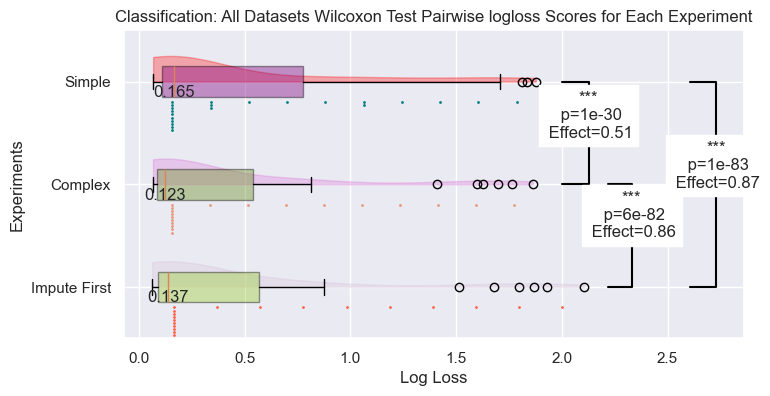

<Figure size 640x480 with 0 Axes>

In [11]:
display_wilcoxon_results(class_data, score_type='logloss',savepath='/Users/gabrielketron/tpot2_addimputers/tpot2/ImputerExperiments/data/c/Saved_Analysis/')